<font size=20, color="#00b140"><b>Making Maps in Python</b></font>
<br>
<font color="#00b140"><i><b>An Overview</b></i></font>
<br>
<br>

This notebook will take you through python code very commonly used to import, sort, and visualize some data, in this case a spreadsheet of USGS core data. We will use `pandas`, a fast, powerful, flexible, and easy-to-use data analysis and manipulation tool, and several packages for geospatial map-making, including `geopandas`, `folium`, and `plotly`.

By completing this notebook, you will be able to:
- See how easy it is to interact with a large dataset that would be cumbersome to handle in Excel (16,000 rows with 25 rows)
- Slice, group, and combine data and perform basic data exploration and visualization
- Make some basic and some fancy maps in python! 

Open this notebook in Colab by clicking this link! [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1grBYTcJwY9oj4DgnQDuUJVkeHLeeFM-b?usp=sharing)

---------------------

This notebook created by:

**Zane Jobe** 

[![Twitter URL](https://img.shields.io/twitter/url/https/twitter.com/ZaneJobe.svg?style=social&label=Follow%20%40ZaneJobe)](https://twitter.com/ZaneJobe)
on Twitter or email me at zanejobe@mines.edu

Zane is an Associate Research Professor in the Department of Geology and Geological Engineering, Colorado School of Mines, and serves as the Director of the [CoRE research group](https://core.mines.edu/) for sedimentary geology and the Leader of the [Data Science: Earth Resources](https://online.mines.edu/er/) online graduate certificate at Mines. 

Prior to Mines, Zane spent 6 years in the Clastics Research Team at Shell Oil Company. His research interests aim to better understand the stratigraphic architecture, scaling relationships, and sediment budgets for channelized depositional systems, with an emphasis on submarine environments. He also enjoys cycling and thinks that copious amounts of yard work can be cathartic. Zane received a B.S. in Geology from the University of Texas at Arlington in 2004, and a Ph.D. in Geology from Stanford University in 2010 (advisor - Don Lowe).

-------------------
# OK, let's do some coding!
## First, let's import some packages
In any python project, you need to install and import the packages you will be using. This is pretty easy in Colab or Jupyter using using `pip` and `import`:

In [1]:
# install stuff
!pip install geopandas
!pip install earthpy
!pip install plotly==4.10.0 # needs to be this latest version (Sept 2020)

# import stuff
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import geopandas as gpd
import earthpy as et

import folium

import plotly.express as px

     |████████████████████████████████| 1.0MB 6.0MB/s 
     |████████████████████████████████| 6.5MB 38.3MB/s 
     |████████████████████████████████| 14.8MB 294kB/s 
     |████████████████████████████████| 1.4MB 5.4MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 19.1MB 61.1MB/s 
  Created wheel for earthpy: filename=earthpy-0.9.2-cp37-none-any.whl size=1365089 sha256=4a53e791d1cfe95dc8a723f4076c7aa20b4aea6c7d2feadabc9de17141deba9d
  Stored in directory: /root/.cache/pip/wheels/27/f9/a5/026bb95ef7b12f9343b842da6897b4001c5b902550095cbbbe
Successfully built earthpy
     |████████████████████████████████| 13.0MB 336kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


## Import some data
We will use a csv file that has lists all the cores in the USGS Core Research Center in Lakewood, CO. I just downloaded it directly from the website and made no changes to it. That's the whole point of all this, which is to work with data you can easily obtain and not spend time manually changing things in Excel. 

You don't need to do this, but if you want to recreate this dataset, you can download this exact spreadsheet from the [USGS CRC](https://my.usgs.gov/crcwc/). Just click search, don't type anything into the boxes. You should get 16,531 rows (as of Feb 2020), which you can export as a CSV at the bottom of the page. You could do the same things for cuttings by clicking on the cuttings tab (there are 53,456 rows in the cuttings database), but we will just stick with cores for now - 16,000 rows is plenty of data for our first foray into python!

If the code to import the data does not work, you can go to [this csv](https://docs.google.com/spreadsheets/d/1fX8ZyF2Pmx7apcBftvWVVOUlPTCRl014cIASIowAVNE/edit?usp=sharing) in Google Drive - open it in Google Sheets, and then click 'Share' in the upper right hand corner. Copy the link, and then paste it below, replacing the `view?usp=sharing` with `export?format=csv`.

BTW - if instead you go to the file straight in Google Drive, and copy the link from there rather than inside of Google Sheets, you need to do the import a slightly different way (described in this [stackoverflow post](https://stackoverflow.com/questions/56611698/pandas-how-to-read-csv-file-from-google-drive-public)). Why it is different in Sheets vs, Drive, I do not know...

In [2]:
# import data using pandas
df = pd.read_csv('https://docs.google.com/spreadsheets/d/1fX8ZyF2Pmx7apcBftvWVVOUlPTCRl014cIASIowAVNE/export?format=csv')

df.head(2) # show the first two lines

,Twn Num,Twn Dir,Rng Num,Rng Dir,Sec,Quarter,Lib Num,API Num,Operator,Well Name,Field,Type,State,County,Photos,Thin Sec,Analysis,Latitude,Longitude,Source,Security Flag,Formation,Age,Min Depth,Max Depth
0,21.0,S,8.0,E,17.0,SWSW,T645,4.301530e+09,WOLF ENERGY,1-17 ANDOVER FED,WILDCAT,FULL,UT,EMERY,F,F,F,38.985290,-111.053300,FROM STATE RECORDS,NO SPECIAL RESTRICTIONS,KAIBAB /LM/,PERM,5147.0,5207.0
1,157.0,N,91.0,W,7.0,SWNW,T646,3.306100e+09,GARY SAMUEL JR,7-5 JOHNSON,WILDCAT,SLABBED,ND,MOUNTRAIL,F,F,T,48.439313,-102.492039,FROM STATE RECORDS,NO SPECIAL RESTRICTIONS,RIVAL,MISS,8047.0,8108.0


## Check out what is in the `DataFrame` we just made

In [3]:
df.info() # this lists all of the column names and their attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16531 entries, 0 to 16530
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Twn Num        16219 non-null  float64
 1   Twn Dir        16176 non-null  object 
 2   Rng Num        16218 non-null  float64
 3   Rng Dir        16175 non-null  object 
 4   Sec            16212 non-null  float64
 5   Quarter        14145 non-null  object 
 6   Lib Num        16531 non-null  object 
 7   API Num        13102 non-null  float64
 8   Operator       16527 non-null  object 
 9   Well Name      16529 non-null  object 
 10  Field          14571 non-null  object 
 11  Type           16072 non-null  object 
 12  State          16451 non-null  object 
 13  County         16530 non-null  object 
 14  Photos         16531 non-null  object 
 15  Thin Sec       16531 non-null  object 
 16  Analysis       16531 non-null  object 
 17  Latitude       16374 non-null  float64
 18  Longit

In [4]:
# now let's make a thickness value from the Depth columns, and then add it to the DataFrame

th=df['Max Depth']-df['Min Depth'] # make the variable
df['Thickness']=th                 # assign it to a new column in dataframe called thickness
df.Thickness.describe()            # get some stats

count    16485.000000
mean       126.122354
std        523.089766
min      -6152.000000
25%         20.000000
50%         41.000000
75%         65.000000
max      16253.000000
Name: Thickness, dtype: float64

A median of 41 feet per well seems ok, but the mean is 126, so the distribution is extremely log-normal. Notice the max and min are obviously errors in the database. We won't worry about that for now, as we want to check out the bulk statistics of the database. But good to know there may be a few weird values that you would want to filter out. 

Also, note that there are a few thickness values missing, as the dataframe is 16531 rows and the thickness only has 16485 rows (meaning some rows don't have depth values).

In [5]:
original_length = len(df)

df = df[df.Thickness>0]            # get rid of negative values
df = df[df.Thickness<1000]         # get rid of huge values

dropped = original_length - len(df)

print(str(dropped)+' values dropped out of '+str(original_length)+' values')

563 values dropped out of 16531 values


## Now let's make some simple plots

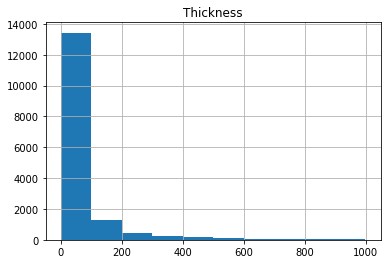

In [6]:
df.hist('Thickness');              # histogram of thickness

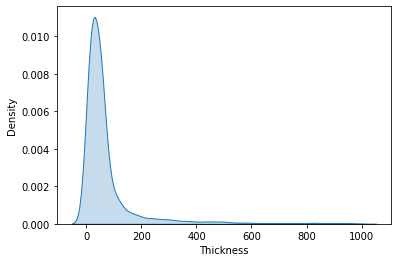

In [7]:
sns.kdeplot(df.Thickness, shade=True); 
# distribution of thickness using a kernel density function - looks nicer, eh?!

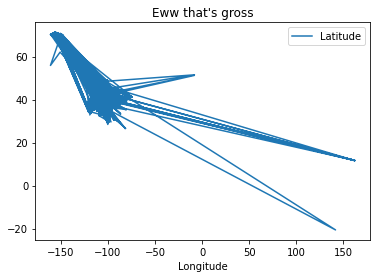

In [8]:
df.plot(x='Longitude', y='Latitude')
plt.title('Eww that\'s gross');

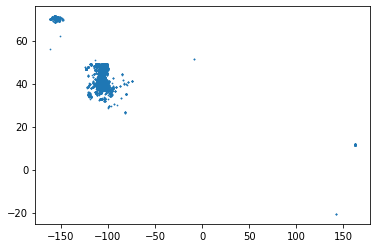

In [9]:
plt.scatter(df.Longitude,df.Latitude, s=0.5);
# slightly better - can you see the Alaska cores?

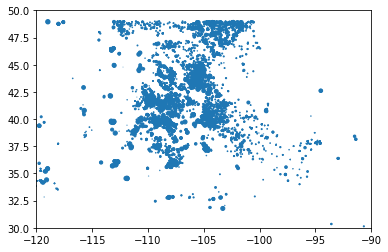

In [10]:
# Let's clip Alaska out of the plot
# and make a bubble plot of core thickness

plt.scatter(df.Longitude,df.Latitude, s=df.Thickness/50)
plt.xlim([-120, -90])
plt.ylim([30, 50]);

# Can you see the Rockies? This is starting to look like the US, 
# but we can do so much better, as you will see below

### But before we go onto making fancier maps, let's make some bar charts!

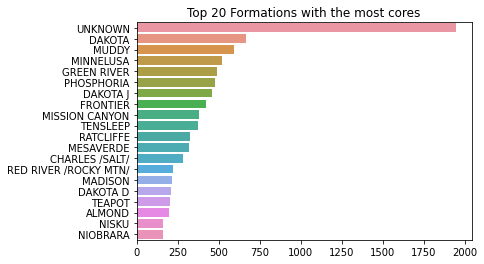

In [11]:
fm_counts=df['Formation'].value_counts() # get value counts of all the formations

sns.barplot(y=fm_counts.index[0:20], 
            x=fm_counts.values[0:20])    # plot it
plt.title('Top 20 Formations with the most cores');

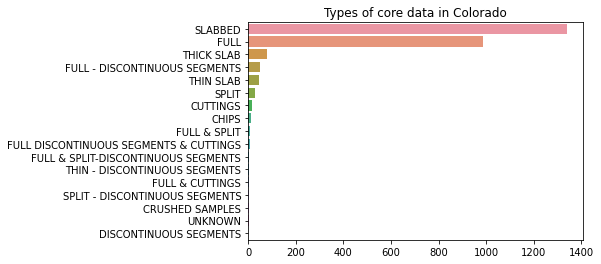

In [12]:
# Show what types of data are in Colorado
co=df.loc[df['State']=='CO']
co_counts=co['Type'].value_counts()
sns.barplot(y=co_counts.index, x=co_counts.values)
plt.title('Types of core data in Colorado');

## Now you try to make a simple plot
Pick anbything! Perhaps a KDE of core thickness from a particular state? Howver, don't fool with lat-long for now, we will spend plenty of time on that later...

In [13]:
# your code here


# Now, let's only look at Wyoming and Colorado cores

In [14]:
cowy=df[df['State'].isin(['CO','WY'])] # Try doing that in Excel...

# Now let's view the number of cores grouped by Formation and State
fm_state=cowy.groupby(['Formation','State']).size()
fm_state=fm_state.sort_values(ascending=False) # sort the values in descending order (i.e., with the largest values at the top)
print(fm_state[0:25])                          # only show the top 25 values

Formation    State
MINNELUSA    WY       506
PHOSPHORIA   WY       451
MUDDY        WY       444
DAKOTA       WY       436
FRONTIER     WY       394
TENSLEEP     WY       349
UNKNOWN      WY       305
DAKOTA J     CO       302
UNKNOWN      CO       295
GREEN RIVER  CO       259
TEAPOT       WY       199
ALMOND       WY       195
MESAVERDE    WY       175
DAKOTA D     CO       159
PARKMAN      WY       144
DAKOTA       CO       126
SHANNON      WY       112
GREEN RIVER  WY       109
NIOBRARA     CO       104
MESAVERDE    CO       103
SUSSEX       CO       102
FORT UNION   WY       101
LEWIS        WY        97
MOWRY        WY        84
WASATCH      WY        80
dtype: int64


In [15]:
# Print some results from one Formation
Fm_of_interest=cowy[cowy['Formation']=='GREEN RIVER']  # pull only one formation out
print('There are',len(Fm_of_interest),'green river cores')
print('Top five wells are:')
print(Fm_of_interest['Well Name'].value_counts()[0:5]) # show the number of cores from each well name (display only the top five)

slab=Fm_of_interest[Fm_of_interest['Type'].isin(['SLABBED'])] # find only slabbed cores (i.e., not whole core or butts)
print('') # white space
print('There are',len(slab),'slabbed green river cores') 

There are 368 green river cores
Top five wells are:
BOIES 10                16
COLORADO CORE HOLE 3    13
BX 1                    11
2 MILO LOVE              8
1 FEDERAL 6765           6
Name: Well Name, dtype: int64

There are 159 slabbed green river cores


In [16]:
# Now look at Fields in Natrona County, WY
wy=df[df['State'].isin(['WY'])]            # only Wyoming
natrona=wy[wy['County'].isin(['NATRONA'])] # only Natrona County
natrona_fields=natrona.groupby('Field').size()
natrona_fields.sort_values(ascending=False)[0:10] # top 10

Field
TEAPOT DOME           69
POISON SPIDER         50
SAGE SPRING CREEK     44
WILDCAT               38
SALT CREEK            34
GRIEVE                24
COLE CREEK            22
HELLS HALF ACRE       20
SOUTH CASPER CREEK    14
WALLACE CREEK         12
dtype: int64

## Now you try a groupby of some of the other columns:
Maybe By `Age` and `Formation`? Or `State` and `County`? Choose any of the column names, but consider whether they are useful for grouping. For example, depth probably isn't useful here, as each core will have a slightly different depth values, so you would end up with thousands of groups. 

You can use the `cowy` variable or make a new one with a different state...

In [17]:
# your code goes here


# Basic maps using geopandas

In [19]:
# get basic geopandas data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

'''
get county data for the US from this website
https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html

We will do this with Earthpy, which takes the zip file, stores it in Colab, and then unzips it and feeds it to geopandas
'''

counties = gpd.read_file(
    et.data.get_data(
        url=
        'https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_county_500k.zip'
        )
    )

'''
Now Let's get some custom data from the EIA
I got the data from this website https://www.eia.gov/maps/maps.htm, and here is a summary map: https://www.eia.gov/maps/images/shale_gas_lower48.jpg
'''

plays = gpd.read_file(
    et.data.get_data(
        url=
        'https://www.eia.gov/maps/map_data/TightOil_ShaleGas_Plays_Lower48_EIA.zip'
        )
    )

basins = gpd.read_file(
    et.data.get_data(
        url=
        'https://www.eia.gov/maps/map_data/SedimentaryBasins_US_EIA.zip'
        )
    )

'''
get NaturalEarthdata
the links below copied from https://github.com/nvkelso/natural-earth-vector/tree/master/geojson
but you can also go to this site https://www.naturalearthdata.com/downloads/

For some weird reason, Colab doesnt like Earthpy .zip files for these (see below for an example), so 
we will be using the geojson files directly from Github instead...
'''
coastlines = gpd.read_file('https://github.com/nvkelso/natural-earth-vector/raw/master/geojson/ne_50m_coastline.geojson')

countries = gpd.read_file('https://github.com/nvkelso/natural-earth-vector/raw/master/geojson/ne_50m_admin_0_boundary_lines_land.geojson')

rivers = gpd.read_file('https://github.com/nvkelso/natural-earth-vector/raw/master/geojson/ne_10m_rivers_lake_centerlines.geojson')

states = gpd.read_file('https://github.com/nvkelso/natural-earth-vector/raw/master/geojson/ne_110m_admin_1_states_provinces.geojson')

cities = gpd.read_file('https://github.com/nvkelso/natural-earth-vector/raw/master/geojson/ne_10m_populated_places.geojson')


Extracted output to /root/earth-analytics/data/earthpy-downloads/cb_2018_us_county_500k
Extracted output to /root/earth-analytics/data/earthpy-downloads/TightOil_ShaleGas_Plays_Lower48_EIA
Extracted output to /root/earth-analytics/data/earthpy-downloads/SedimentaryBasins_US_EIA


For any of these data, you could also:

- Download the files (don't unzip them)
- click on the little folder icon on the left-hand sidebar
- click the little up-arrow button, and select the zip file and upload them
- then right-click on that file and copy the path and use it to read directly into geopandas using gpd.read_file('filename.shp')

## Let's take a look at some of the data

In [20]:
basins.head(3) # what does basins look like?

,NAME,Area_sq_km,Area_sq_mi,geometry
0,ANADARKO,42477.675069,16400.722036,"POLYGON ((-101.02878 36.06446, -100.92003 36.2..."
1,APPALACHIAN,415455.877946,160408.411275,"MULTIPOLYGON (((-84.97860 35.83618, -85.19261 ..."
2,ARDMORE,4120.137623,1590.794030,"POLYGON ((-97.96769 34.65231, -97.93570 34.639..."


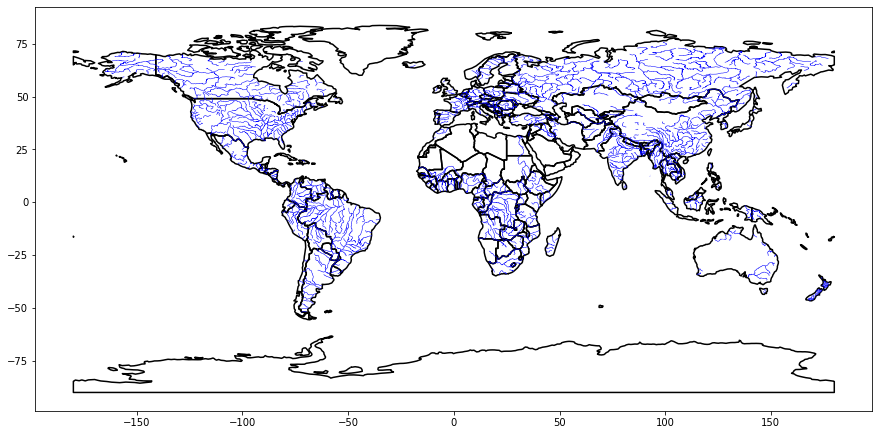

In [21]:
# Let's make a simple figure

fig, ax = plt.subplots(figsize=[15,15])
world.boundary.plot(ax=ax,color='k') #the boundary method only plots the outlines
rivers.plot(ax=ax,color='b',linewidth=0.5)
ax.set_aspect('equal')

In [22]:
world.head(3)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."


It would be nice to be able to label these countries or cities. See if you can figure out how to do that (here is a [hint](https://github.com/shotleft/how-to-python/blob/master/How%20it%20works%20-%20labelling%20districts%20in%20GeoPandas.ipynb)). 

First, subset the geodataframe so that it is just one continent, and then plot only that continent and its country labels

In [23]:
world.continent.unique() # what continents do we have?

array(['Oceania', 'Africa', 'North America', 'Asia', 'South America',
       'Europe', 'Seven seas (open ocean)', 'Antarctica'], dtype=object)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  from ipykernel import kernelapp as app


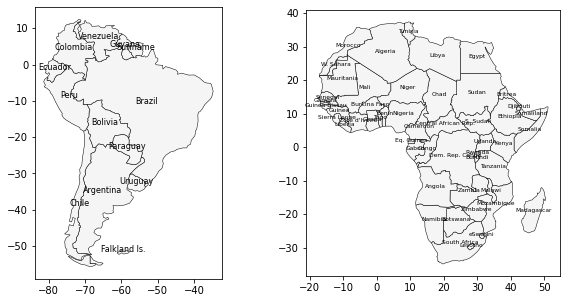

In [24]:
#only south america
south_america = world[world.continent=='South America']
africa = world[world.continent=='Africa']

#plot
fig, axs = plt.subplots(1,2,figsize=[10,5])
south_america.plot(ax=axs[0],color='whitesmoke', edgecolor='k',linewidth=0.5)
africa.plot(ax=axs[1],color='whitesmoke', edgecolor='k',linewidth=0.5)

#labels
south_america.apply(lambda x: axs[0].annotate(s=x['name'], xy=x.geometry.centroid.coords[0], ha='center',fontsize=8,color='black'),axis=1);

# can also loop it like this:
for x, y, label in zip(africa.centroid.x, 
                       africa.centroid.y, 
                       africa.name):
    axs[1].text(x, y, label, fontsize = 6, color='k', ha='center')

for ax in axs: ax.set_aspect('equal')


In [25]:
# Now you try!

# your code here
# your code here
# your code here

### Now let's look at EIA 'oil shale basins':

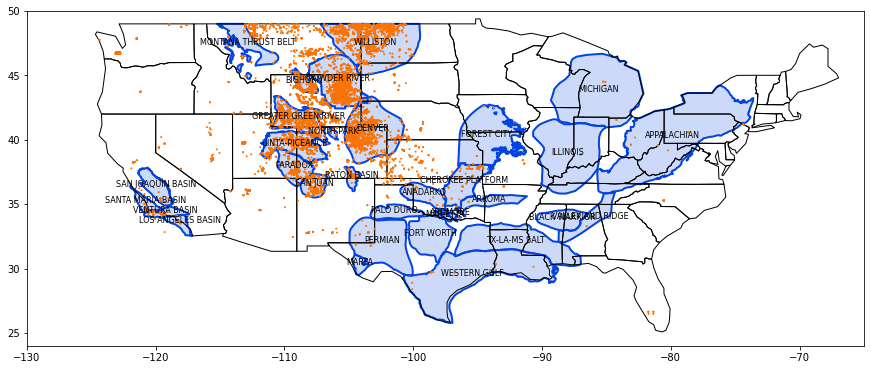

In [26]:
fig, ax = plt.subplots(figsize=[15,15])

basins.plot(ax=ax,facecolor='xkcd:blue', alpha=0.2, edgecolor='none') # shade
basins.plot(ax=ax,facecolor='none', edgecolor='xkcd:blue', linewidth=2) # outlines
states.plot(ax=ax,facecolor='none',edgecolor='k',linewidth=1)

ax.scatter(df.Longitude, df.Latitude, s=1, facecolors='none', edgecolors='xkcd:orange')

basins.apply(lambda x: ax.annotate(s=x['NAME'], xy=x.geometry.centroid.coords[0], ha='center',fontsize=8,color='black'),axis=1);

ax.set_xlim([-130,-65])
ax.set_ylim([24,50])
ax.set_aspect('equal');

Looks a bit stretched - this has to do with the coordinate reference system - these are in a geographic coordinate system (WGS84), and we are used to looking at things in Mercator projection are projected in WGS84, but we are used to looking at things in Spherical Mercator, which is a projected coordinate system. Here is a [good intro](https://jcutrer.com/python/learn-geopandas-plotting-usmaps) to this issue. 

Let's take a look at the CRS:

In [27]:
basins.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [28]:
# Let's also take our original dataframe and make it a geopandas
# We will also reproject all the data in there to be in Mercator
df_geo = gpd.GeoDataFrame(df, crs='EPSG:4326', geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

albers_equal_area = 'EPSG:2163'
google_maps = 'EPSG:3857'

df_geo = df_geo.to_crs(albers_equal_area)

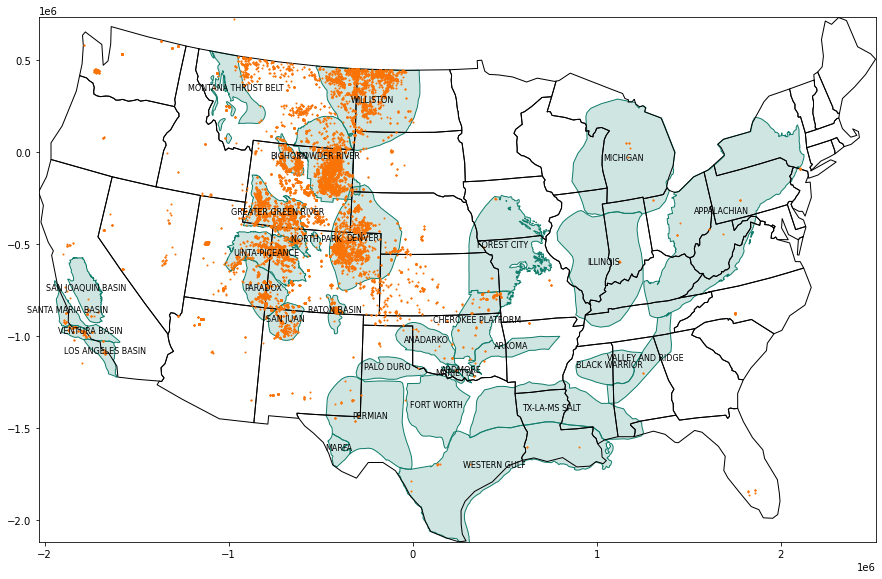

In [29]:
fig, ax = plt.subplots(figsize=[15,15])

basins_proj = basins.to_crs(albers_equal_area)
states_proj = states.to_crs(albers_equal_area)

# only the Lower 48 one-liner
states_proj.drop(states_proj[states_proj.name.isin(['Alaska','Hawaii'])].index, inplace=True) 

basins_proj.plot(ax=ax,facecolor='xkcd:blue green', alpha=0.2, edgecolor='none') # shade
basins_proj.plot(ax=ax,facecolor='none', edgecolor='xkcd:blue green') # outlines
states_proj.plot(ax=ax,facecolor='none',edgecolor='k',linewidth=1)

df_geo.plot(ax=ax,color='xkcd:orange',markersize=1)

basins_proj.apply(lambda x: ax.annotate(s=x['NAME'], xy=x.geometry.centroid.coords[0], ha='center',fontsize=8,color='black'),axis=1);

xlim = ([states_proj.total_bounds[0],  states_proj.total_bounds[2]])
ylim = ([states_proj.total_bounds[1],  states_proj.total_bounds[3]])

ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_aspect('equal');

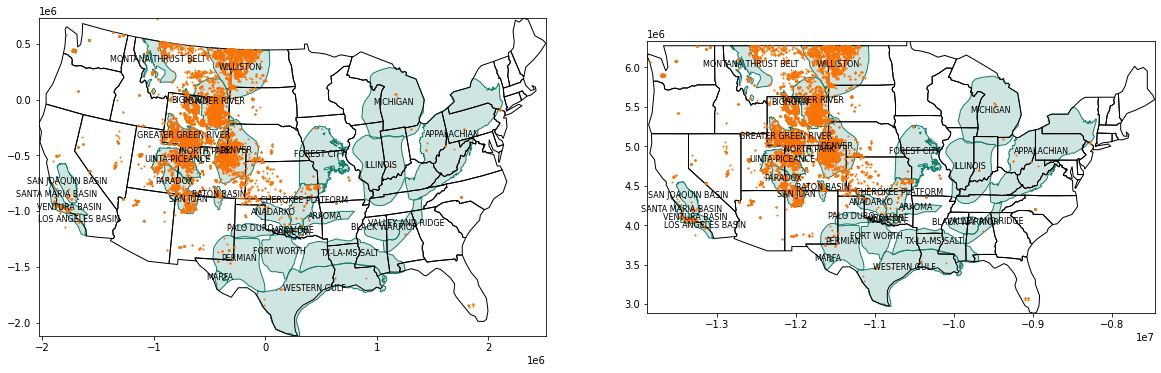

In [30]:
# compare two projections

fig, axs = plt.subplots(1,2,figsize=[20,10])

# EQUAL AREA
basins_proj.plot(ax=axs[0],facecolor='xkcd:blue green', alpha=0.2, edgecolor='none') # shade
basins_proj.plot(ax=axs[0],facecolor='none', edgecolor='xkcd:blue green') # outlines
states_proj.plot(ax=axs[0],facecolor='none',edgecolor='k',linewidth=1)
df_geo.plot(ax=axs[0],color='xkcd:orange',markersize=1)
basins_proj.apply(lambda x: axs[0].annotate(s=x['NAME'], xy=x.geometry.centroid.coords[0], ha='center',fontsize=8,color='black'),axis=1);
xlim = ([states_proj.total_bounds[0],  states_proj.total_bounds[2]]); ylim = ([states_proj.total_bounds[1],  states_proj.total_bounds[3]])
axs[0].set_xlim(xlim); axs[0].set_ylim(ylim); axs[0].set_aspect('equal');

# GOOGLE MAPS Psuedo Mercator
basins_proj = basins.to_crs(google_maps)
states_proj = states_proj.to_crs(google_maps)
df_geo = df_geo.to_crs(google_maps)

basins_proj.plot(ax=axs[1],facecolor='xkcd:blue green', alpha=0.2, edgecolor='none') # shade
basins_proj.plot(ax=axs[1],facecolor='none', edgecolor='xkcd:blue green') # outlines
states_proj.plot(ax=axs[1],facecolor='none',edgecolor='k',linewidth=1)
df_geo.plot(ax=axs[1],color='xkcd:orange',markersize=1)
basins_proj.apply(lambda x: axs[1].annotate(s=x['NAME'], xy=x.geometry.centroid.coords[0], ha='center',fontsize=8,color='black'),axis=1);
xlim = ([states_proj.total_bounds[0],  states_proj.total_bounds[2]]); ylim = ([states_proj.total_bounds[1],  states_proj.total_bounds[3]])
axs[1].set_xlim(xlim); axs[1].set_ylim(ylim); axs[1].set_aspect('equal');

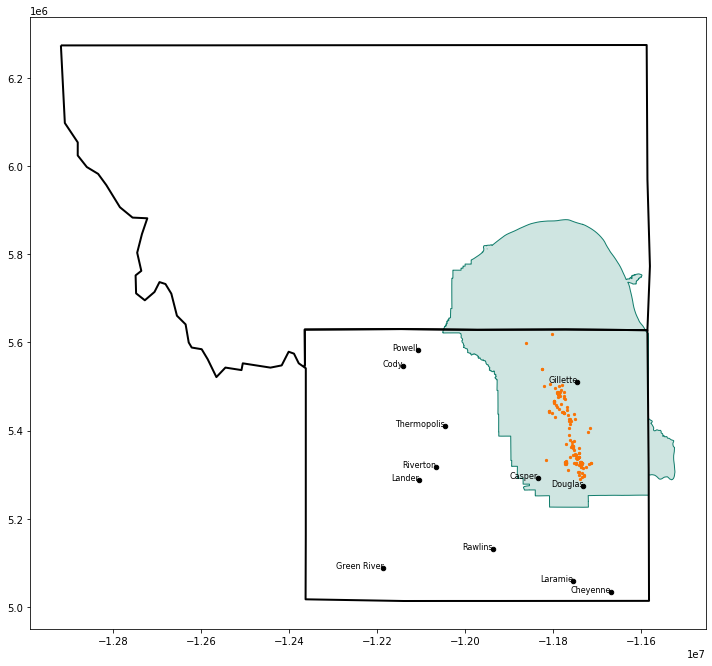

In [31]:
# now just the Powder River Basin
cities_sub = cities.to_crs(google_maps)[cities.ADM1NAME=='Wyoming']
df_geo_sub = df_geo[df_geo.State=='WY']

fig, ax = plt.subplots(figsize=[10,10])

basins_proj[basins_proj.NAME=='POWDER RIVER'].plot(ax=ax,facecolor='xkcd:blue green', alpha=0.2, edgecolor='none') # shade
basins_proj[basins_proj.NAME=='POWDER RIVER'].plot(ax=ax,facecolor='none', edgecolor='xkcd:blue green') # outlines
states_proj[states_proj.name=='Wyoming'].plot(ax=ax,facecolor='none',edgecolor='k',linewidth=2)
states_proj[states_proj.name=='Montana'].plot(ax=ax,facecolor='none',edgecolor='k',linewidth=2)

cities_sub.plot(ax=ax,color='k',markersize=20)

df_geo_sub[df_geo_sub.Formation=='PARKMAN'].plot(ax=ax,color='xkcd:orange',markersize=5)

cities_sub.apply(lambda x: ax.annotate(s=x['NAME'], xy=x.geometry.centroid.coords[0],ha='right',fontsize=8,color='black'),axis=1);

ax.set_aspect('equal')
plt.tight_layout();

### Your turn!

Pick another basin and formation, and make another map!

In [32]:
### your code goes here

# figure out a basin and formation using pandas

In [33]:
### your code goes here

# Now plot it using geopandas!

## Folium web-mapping
Folium is a pretty cool package in python that allows you to make interactive, zoomable maps using a Java package called leaflet. We will only scratch the surface of the [capabilities of Folium](https://python-visualization.github.io/folium/quickstart.html) - you can embed these maps on a website, and make all kinds of cool, interactive plots. 

These types of maps are super useful when you need to re-plot the same map over and over, for example, to update a website for weekly rainfall data, or highlight counties that have active wells drilling, etc.

In [36]:
# define a dataset to map
formation_to_map = df[df.Formation=='NIOBRARA'] # subset the original dataframe

formation_to_map = formation_to_map.dropna(subset=['Latitude']) # get rid of wells with no location information

# now create a map
m = folium.Map(
    location=[42, -105],
    tiles='Stamen Terrain',
    zoom_start=6
)

# and add stuff to that map
for row in formation_to_map.iterrows():
  row_values = row[1]
  location = [row_values['Latitude'], row_values['Longitude']]
  popup = row_values['Well Name']
  folium.Marker(location = location, popup = popup).add_to(m)

m

In [37]:
# get some info about a particular well

# click on a well and copy the well name, then paste it below 
name = '2 BOXELDER FARMS'

df[df['Well Name']==name]

,Twn Num,Twn Dir,Rng Num,Rng Dir,Sec,Quarter,Lib Num,API Num,Operator,Well Name,Field,Type,State,County,Photos,Thin Sec,Analysis,Latitude,Longitude,Source,Security Flag,Formation,Age,Min Depth,Max Depth,Thickness,geometry
10297,2.0,S,66.0,W,1.0,NWNE,B262,500106884.0,CHAMPLIN PETROLEUM,2 BOXELDER FARMS,THIRD CREEK,SLABBED,CO,ADAMS,T,T,T,39.908801,-104.721726,FROM STATE RECORDS,NO SPECIAL RESTRICTIONS,NIOBRARA,CRET,7736.0,7764.0,28.0,POINT (-104.72173 39.90880)


Now let's try another formation, and we will use the OpenStreetMap tiles this time. 

In [38]:
formation_to_map = df[df.Formation=='PARKMAN'] # subset the original dataframe

formation_to_map = formation_to_map.dropna(subset=['Latitude']) # get rid of wells with no location information

# now create a map
m = folium.Map(
    location=[45, -105],
    tiles='OpenStreetMap',
    zoom_start=6
)

# and add stuff to that map
for row in formation_to_map.iterrows():
  row_values = row[1]
  location = [row_values['Latitude'], row_values['Longitude']]
  popup = row_values['Well Name']
  folium.Marker(location = location, popup = popup).add_to(m)

m

### Another way, using geojson format (which we won't do today)
In addition to pandas dataframe, another common way to store this type of data is in a geojson file. More on that format at [geojson.org](https://geojson.org). An example of creating a geojson file from a pandas DataFrame is shown in a nice notebook [here](https://github.com/gboeing/urban-data-science/blob/master/17-Leaflet-Web-Mapping/leaflet-simple-demo/pandas-to-geojson.ipynb). Feel free to test that out! We won't get into those details now, but now you have the background to be able to play around with `folium` or `Basemap` or `ipyleaflet` or some of the other web-mapping programs! 

## Plotly

Plotly is pretty sweet - it's even easier than folium, in my opinion. Beware, however, that plotly is a business, and they make money by getting you to sign up for their API and dashboard. So, it's really only partially open-source...

Brendon Hall has a nice plotly notebook that he summarized in [this LinkedIn post](https://www.linkedin.com/pulse/interactive-well-maps-python-brendon-hall). Check that out, as well as the myriad of plotly tutorials online. 

### Let's look at the USGS website
Go check out the [Map based search](https://my.usgs.gov/crcwc/map) at the USGS CRC. Are you ready to recreate that map (and actually make it better) in about ten lines of code? 

### Let's make a quick plotly map

In [39]:
df_sub = df[df.State=='WY']
df_sub = df_sub[['Well Name','Latitude','Longitude','Formation','Thickness']]
df_sub = df_sub.dropna()

fig = px.scatter_mapbox(df_sub, lat="Latitude", lon="Longitude",
                        color='Formation', 
                        zoom=5, height=600,
                        hover_data={'Well Name': True,
                                    'Latitude': False,
                                    'Longitude': False,
                                    'Formation': True,
                                    'Thickness': True}
                        )
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":200,"t":20,"l":200,"b":0})
fig.show()

![Damn](https://media1.tenor.com/images/3e64ea8c3ee1147ec50376620f984792/tenor.gif?itemid=5580082)

In [ ]:
# Now you try a plotly map! 

# your code here

So, see, being a fancy data scientist isn't rocket science, it's mostly just googling things. 
![Googling is half](https://img.ifunny.co/images/072cea68327e54d5816c1a2f921f2958440586b2da0af7e9656f5255d2c7ab7b_1.jpg)

---------

# The End
Hope this has been a useful tutorial, and don't forget to visit Zane's [research group website!](https://core.mines.edu) and the [Crude Audacity podcast](https://podcasts.apple.com/us/podcast/the-crude-audacity/id1480993402)

![Work here is done](https://media1.tenor.com/images/168afe17abdf88b0d439c901f134a6f4/tenor.gif?itemid=4705793)

In [ ]:
# BONUS! From Kristopher Purens
# Doesn't work right in Colab though...

!pip install ipyleaflet
import ipyleaflet

m = ipyleaflet.Map(
    center=(30,-100),
    zoom=5
    )

bm_macrostrat = { 'url': 'https://tiles.macrostrat.org/carto/{z}/{x}/{y}.png', 
                 'max_zoom': 20, 'attribution': '<a href="https://macrostrat.org/">Macrostrat</a>', 
                 'name': 'Macrostrat'
                 } 

macrostrat_layer = ipyleaflet.basemap_to_tiles(bm_macrostrat) 

m.add_layer(macrostrat_layer)

m
